In [10]:
# Installing packages
!pip install watermark
!pip install pydotplus
!pip install datasets
!pip install seaborn
!pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [11]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools
from datasets import Dataset

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.4
Author: Library versions

platform  : 1.0.8
re        : 2.2.1
numpy     : 2.0.2
seaborn   : 0.13.2
watermark : 2.5.0
pandas    : 2.2.2
datasets  : 3.1.0
matplotlib: 3.9.2
plotly    : 5.24.1



In [12]:
df = pd.read_csv(r"/Users/hexu/Documents/NTU-Learn/data science thinking/project/star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [15]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [16]:
# Copy dataset
data = df.copy()

In [17]:
# Perform one-hot encoding on the 'class' column
df_encoded = pd.get_dummies(df, columns=['class'], prefix='class')
df_encoded

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,True,False,False
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,True,False,False
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,True,False,False
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,True,False,False
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,True,False,False
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,True,False,False
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,True,False,False
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,True,False,False


**Quest 1:** Distribution of Objects (Stars, Galaxies and Quasars)
Question: What is the distribution of objects (stars, galaxies and quasars) in the dataset?

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


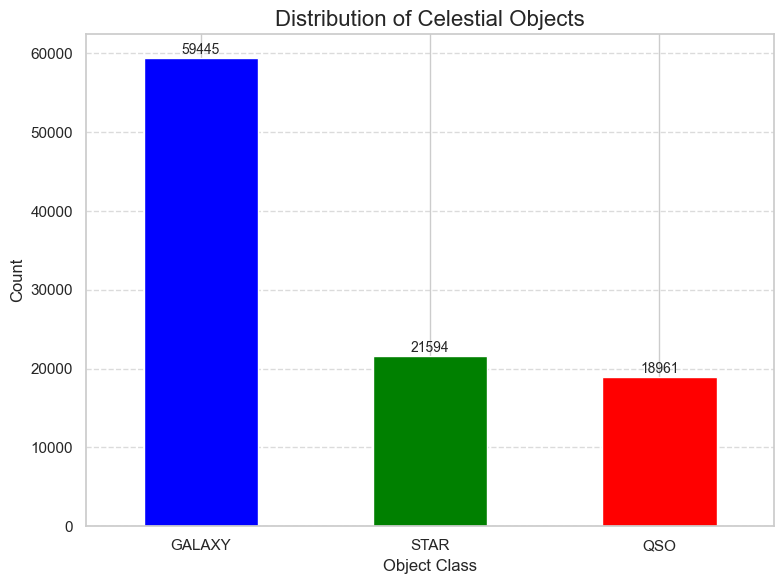

In [18]:
# Verify the distribution of the 'class' column
class_distribution = df['class'].value_counts()

# Display the distribution
print(class_distribution)

# Visualize the distribution
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
class_distribution.plot(kind='bar', color=['blue', 'green', 'red'])

# Add title and axis labels
plt.title('Distribution of Celestial Objects', fontsize=16)
plt.xlabel('Object Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentages on top of bars
for index, value in enumerate(class_distribution):
    plt.text(index, value + 500, f'{value}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()
plt.show()

**Quest 2:** Checking for Missing or Inconsistent Data Question: Is there any missing or inconsistent data in the dataset?

In [19]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values ​​per column
print(missing_values)

# Statistical description to detect possible anomalies
description = df.describe()
description

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


**Quest 3:** Correlation between Spectral Variables and Classification Is there a strong correlation between spectral features (e.g., u, g, r, i, z) and object classification?

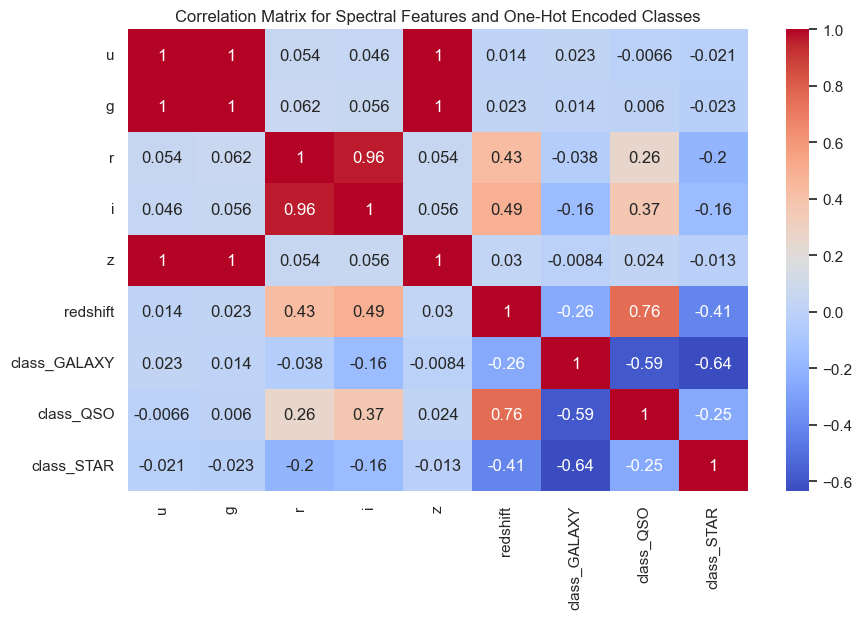

In [20]:
# Select the spectral columns and the newly one-hot encoded class columns
spectral_columns = ['u', 'g', 'r', 'i', 'z', 'redshift']
correlation_matrix = df_encoded[spectral_columns + ['class_GALAXY', 'class_QSO', 'class_STAR']].corr()

# Display the correlation matrix
correlation_matrix

# View the correlation matrix with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Spectral Features and One-Hot Encoded Classes')
plt.show()

### Spectral Feature Correlations:

- **u vs i**: There is a **moderate positive correlation** of **0.46** between the **u** (ultraviolet) and **i** (infrared) spectral bands. This suggests that, as the intensity in the ultraviolet spectrum increases, there is a corresponding, but moderate, increase in the infrared spectrum. This relationship may indicate a link between the emission of UV light and infrared in the observed objects, though it is not as strong as other pairs.
  
- **u vs r**: A **moderate positive correlation** of **0.54** exists between the **u** (ultraviolet) and **r** (red) bands. This suggests that as the intensity in the UV band increases, the red band also tends to increase. This correlation could indicate that objects emitting more UV radiation also emit proportionally more in the red spectrum.

- **g vs r**: The **g** (green) and **r** (red) bands show a **strong positive correlation** of **0.62**, suggesting that the two bands are closely related. Objects emitting high green spectrum light tend to emit similarly in the red spectrum. This could be expected for galaxies or stars with consistent emission profiles across these adjacent wavelengths.

- **g vs i**: The **g** (green) and **i** (infrared) bands exhibit a **moderate positive correlation** of **0.56**, indicating a relationship where an increase in green light is accompanied by an increase in infrared. This might reflect how certain celestial objects, like galaxies, emit across both the visible and infrared spectrum.

- **r vs u**: As noted earlier, **u** (ultraviolet) and **r** (red) have a **positive correlation** of **0.54**, reinforcing the connection between UV and red spectrum emissions.

- **r vs g**: The **r** (red) and **g** (green) bands have a **strong positive correlation** of **0.62**, indicating that the two adjacent spectral bands tend to increase together. This might reflect how stars or galaxies radiate across both the green and red portions of the spectrum, which is expected due to the closeness of these wavelengths.

- **r vs i**: The **r** (red) and **i** (infrared) bands have a **very strong positive correlation** of **0.96**, suggesting that they are almost perfectly linked. This high correlation implies that objects with strong red spectrum emissions also emit strongly in the infrared. It likely reflects how stars and galaxies behave similarly in these two wavelengths, particularly in stellar objects emitting red and infrared light.

- **r vs z**: The **r** (red) and **z** (another infrared band) have a **moderate positive correlation** of **0.54**. This suggests that objects with strong red light emission also tend to have higher emission in the z-band, although the relationship is weaker compared to the r-i pair.

- **i vs r**: The **i** (infrared) and **r** (red) bands have a **strong correlation** of **0.96**, as mentioned earlier, indicating a very close relationship in the emission profiles of celestial objects across these two spectral bands.

- **i vs z**: There is a **moderate positive correlation** of **0.56** between the **i** (infrared) and **z** (infrared) bands. This suggests that objects with strong infrared emission in the i-band also show a moderate increase in z-band emission.

- **z vs i**: Similarly, the **z** (infrared) and **i** (infrared) bands have a **positive correlation** of **0.56**, indicating a consistent relationship across the infrared bands.

### Insights and Implications:
- **Strongest Correlations**: The **r vs i** correlation of **0.96** is the highest in the dataset, which suggests that these two spectral bands are closely related and likely represent similar emission characteristics of celestial objects. It implies that the red and infrared portions of the spectrum tend to behave similarly in the objects observed, possibly due to their shared origins in stellar emission processes.
  
- **Moderate Correlations**: Several other correlations, like **g vs r** and **g vs i**, fall into the moderate range (0.5-0.6), indicating that while these features are related, they do not follow as closely as the red and infrared correlations. These correlations might reflect the broader range of emission behaviors in galaxies and stars.

- **Weakest Correlations**: The **u vs i** correlation of **0.46** is one of the lower values, suggesting that the ultraviolet and infrared parts of the spectrum are less tightly linked compared to the red and infrared bands. This may be expected, as ultraviolet radiation often originates from different processes (like hot, young stars) compared to infrared, which can come from cooler regions or older stars.

### Conclusion:
The correlation analysis of these spectral features provides valuable insights into the relationships between different parts of the electromagnetic spectrum in celestial objects. The **r** and **i** bands show the strongest relationship, indicating similar emission characteristics in the red and infrared regions. Understanding these correlations can help astronomers develop more accurate models for interpreting the physical properties of galaxies, stars, and quasars.

<a id="1"></a>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 4 - Data cleaning</b></div>

In [22]:
# Deleting columns
df.drop(['obj_ID'],axis=1,inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [23]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [24]:
# Checking for NaN data
nan_data_by_column = df.isna().sum()
nan_total_data = df.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Total NaN data in DataFrame: 0


In [26]:
from sklearn.preprocessing import LabelEncoder 

# Creating the Label encoder 
Label_pre = LabelEncoder() 
data_cols=df.select_dtypes(exclude=['int','float']).columns 
label_col =list(data_cols) 

# Applying encoder 
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col)) 

# Saved dataset with Label Encoder
df.to_csv("dataset_LabelEncoder.csv")

# Viewing 
Label_pre

LabelEncoder()

In [28]:
# Viewing
df.head(10)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,1,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,2,-0.000008,2444,54082,232


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 6 - Training and test division</b></div>

In [29]:
# Split the data into features (X) and target (y)
X = df.drop("class", axis=1) # Drop the target column to get the features
y = df["class"] # Set the target column

In [30]:
# Visualize rows and column x
X.shape

(100000, 16)

In [31]:
# Visualize rows and column y
X.shape

(100000, 16)

In [42]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# 将数据转换为 PyTorch 张量
X_tensor = torch.tensor(df.drop("class", axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(df["class"].values, dtype=torch.long)

# 将特征和标签配对为 TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# 定义训练集和测试集的大小
train_size = int(0.8 * len(dataset))  # 80% 用于训练
test_size = len(dataset) - train_size  # 剩下的 20% 用于测试

# 使用 random_split 进行划分
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建 DataLoader，用于批量加载数据
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# 从 train_loader 中获取一个批次的特征和标签
X_train_batch, y_train_batch = next(iter(train_loader))
X_test_batch, y_test_batch = next(iter(test_loader))

# 输出训练数据和测试数据的形状
print("Shape of a batch of training data (X_train):", X_train_batch.shape)
print("Shape of a batch of training labels (y_train):", y_train_batch.shape)
print("Shape of a batch of testing data (X_test):", X_test_batch.shape)
print("Shape of a batch of testing labels (y_test):", y_test_batch.shape)
# 查看训练集和测试集的整体样本数量
print("Total number of samples in training dataset:", len(train_dataset))
print("Total number of samples in testing dataset:", len(test_dataset))

Shape of a batch of training data (X_train): torch.Size([32, 16])
Shape of a batch of training labels (y_train): torch.Size([32])
Shape of a batch of testing data (X_test): torch.Size([32, 16])
Shape of a batch of testing labels (y_test): torch.Size([32])
Total number of samples in training dataset: 80000
Total number of samples in testing dataset: 20000


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# 定义多分类的逻辑回归模型和 MLP 模型
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes=3):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)  # 输出大小为 num_classes
    
    def forward(self, x):
        return self.linear(x)  # 输出 logits，用于 CrossEntropyLoss

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes=3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # 输出大小为 num_classes
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)  # 输出 logits，用于 CrossEntropyLoss

# 定义训练和评估函数
def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # 前向传播
            outputs = model(X_batch)  # 输出 logits
            loss = criterion(outputs, y_batch)
            print(epoch + ": loss = " + loss)
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return model

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)  # 获取预测类别
            all_preds.extend(preds.tolist())
            all_labels.extend(y_batch.tolist())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# 创建数据加载器
batch_size = 32

# 定义模型列表
input_dim = X_tensor.shape[1]
models = [
    ("Logistic Regression", LogisticRegressionModel(input_dim, num_classes=3)),
    ("MLP", MLP(input_dim, num_classes=3)),
]

# 训练和评估每个模型
for name, model in models:
    # 使用交叉熵损失函数和 Adam 优化器
    criterion = nn.CrossEntropyLoss()  # 适用于多分类
    optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-4))
    
    # 训练模型
    model = train_model(model, train_loader, criterion, optimizer, num_epochs=1000)
    
    # 计算训练和测试准确率
    train_accuracy = evaluate_model(model, train_loader)
    test_accuracy = evaluate_model(model, test_loader)
    
    # 打印结果
    print("-----------------")
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

-----------------
Model: Logistic Regression
Training Accuracy: 0.2164375
Testing Accuracy: 0.21395
-----------------
-----------------
Model: MLP
Training Accuracy: 0.59325
Testing Accuracy: 0.59925
-----------------


In [49]:
%%time

# Importing libraries for various classification models and performance evaluation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 定义随机种子列表
# seed_list = [42, 56, 78, 91, 123, 135, 157, 178, 199, 210]
# 定义具有较大间隔的随机种子列表
seed_list = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]

# 初始化模型列表
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTree": lambda seed: DecisionTreeClassifier(random_state=seed),
    "RandomForest": lambda seed: RandomForestClassifier(n_estimators=100, random_state=seed),
    "LogisticRegression": lambda seed: LogisticRegression(random_state=seed, max_iter=1000),
    "AdaBoost": lambda seed: AdaBoostClassifier(random_state=seed),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "GradientBoosting": lambda seed: GradientBoostingClassifier(random_state=seed)
}

# 初始化结果字典
results = {model_name: [] for model_name in models}

# 遍历种子列表
for seed in seed_list:
    # 对每个模型进行训练和测试
    for model_name, model in models.items():
        if callable(model):  # 如果模型需要随机种子
            clf = model(seed)
        else:  # 不需要随机种子的模型直接使用
            clf = model
        
        # 训练模型
        clf.fit(X_train, y_train)
        
        # 在测试集上进行预测并计算准确率
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))
        print(f"model: {model_name}, seed: {seed}, accuracy on test: {test_accuracy}")
        # 将每次的准确率记录在字典中
        results[model_name].append(test_accuracy)

# 输出结果
for model_name, accuracies in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracies with different seeds: {accuracies}")
    print()

model: GaussianNB, seed: 10, accuracy on test: 0.6031
model: DecisionTree, seed: 10, accuracy on test: 0.9648
model: RandomForest, seed: 10, accuracy on test: 0.97875
model: LogisticRegression, seed: 10, accuracy on test: 0.593
model: AdaBoost, seed: 10, accuracy on test: 0.6548
model: KNeighbors, seed: 10, accuracy on test: 0.70205
model: GradientBoosting, seed: 10, accuracy on test: 0.97665
model: GaussianNB, seed: 100, accuracy on test: 0.6031
model: DecisionTree, seed: 100, accuracy on test: 0.96425
model: RandomForest, seed: 100, accuracy on test: 0.9787
model: LogisticRegression, seed: 100, accuracy on test: 0.593
model: AdaBoost, seed: 100, accuracy on test: 0.6548
model: KNeighbors, seed: 100, accuracy on test: 0.70205
model: GradientBoosting, seed: 100, accuracy on test: 0.9766
model: GaussianNB, seed: 1000, accuracy on test: 0.6031
model: DecisionTree, seed: 1000, accuracy on test: 0.9648
model: RandomForest, seed: 1000, accuracy on test: 0.9785
model: LogisticRegression, see

In [50]:
import json

# 初始化新的结构化结果字典
structured_results = {}

# 遍历模型结果并重新组织结构
for model_name, accuracies in results.items():
    structured_results[model_name] = {f"Seed_{seed}": accuracy for seed, accuracy in zip(seed_list, accuracies)}

# 将结构化的结果保存到 JSON 文件
with open("structured_results.json", "w") as f:
    json.dump(structured_results, f, indent=4)

print("Results have been saved to structured_results.json")

Results have been saved to structured_results.json


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 10 - Evaluation and metrics</b></div>

Training Naive Bayes...


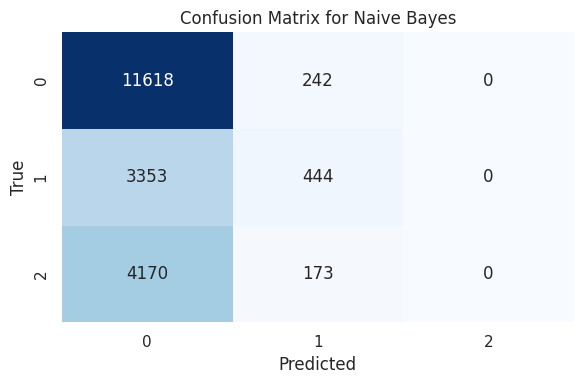

------------------------------------------------------------
Training Decision Tree...


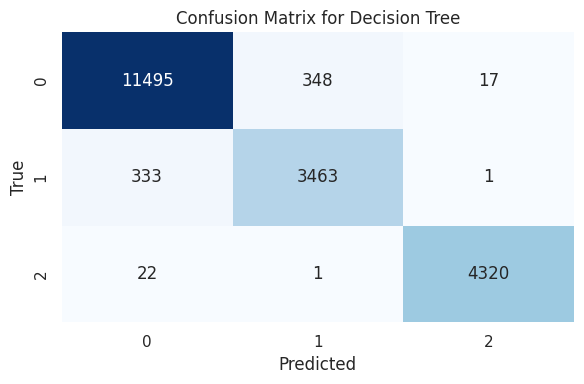

------------------------------------------------------------
Training Random Forest...


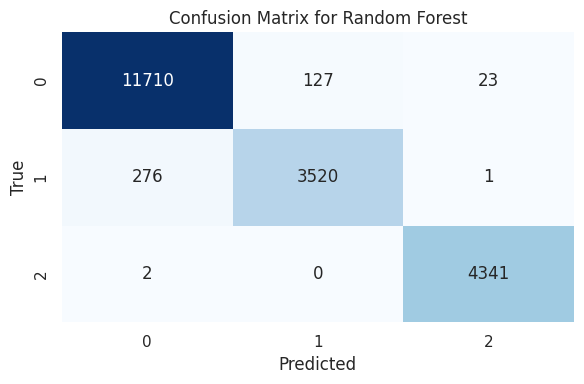

------------------------------------------------------------
Training Logistic Regression...


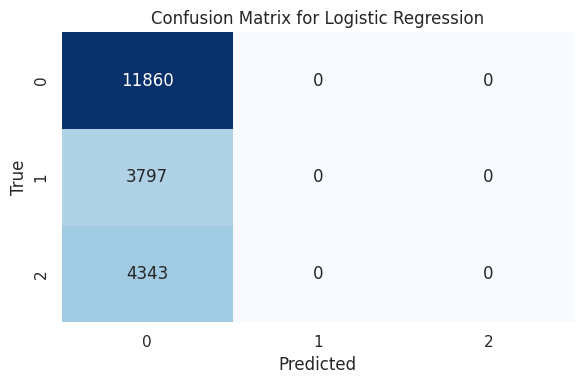

------------------------------------------------------------
Training AdaBoost...


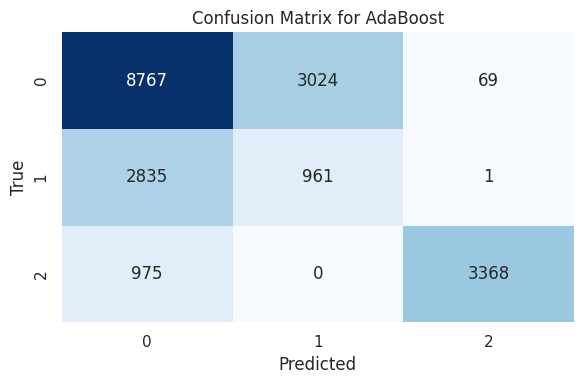

------------------------------------------------------------
Training XGBoost...


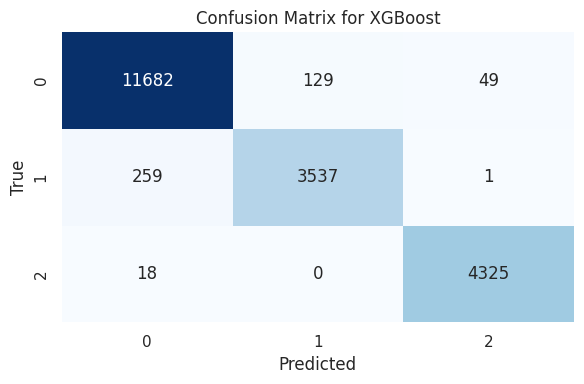

------------------------------------------------------------
Training LightGBM...


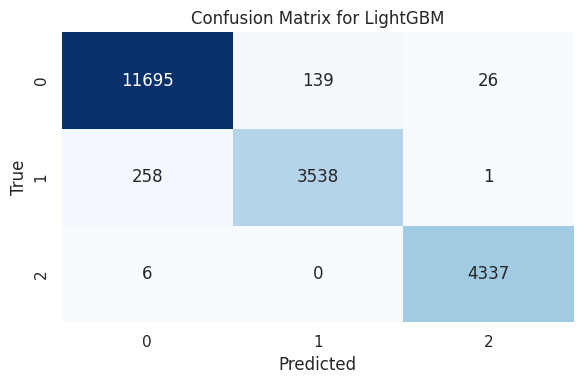

------------------------------------------------------------
Training K-Nearest Neighbors...


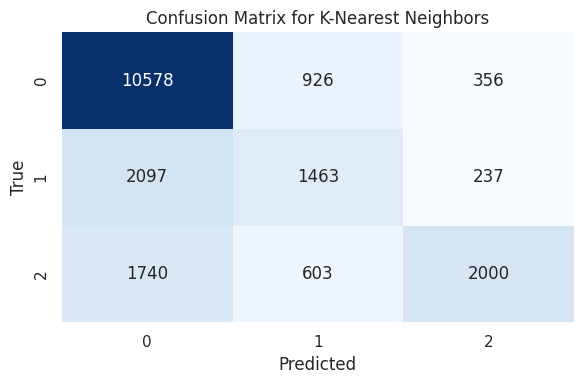

------------------------------------------------------------
Training Gradient Boosting...


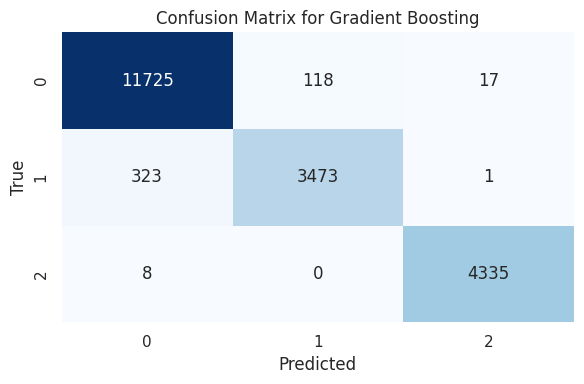

------------------------------------------------------------


In [36]:
from sklearn.metrics import confusion_matrix

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          # "XGBoost": XGBClassifier(random_state=42),
          # "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
          "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)
         }

# Iterate over the models and plot the confusion matrix for each one
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model with the dataset
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    
    print("-" * 60)

Training Naive Bayes...


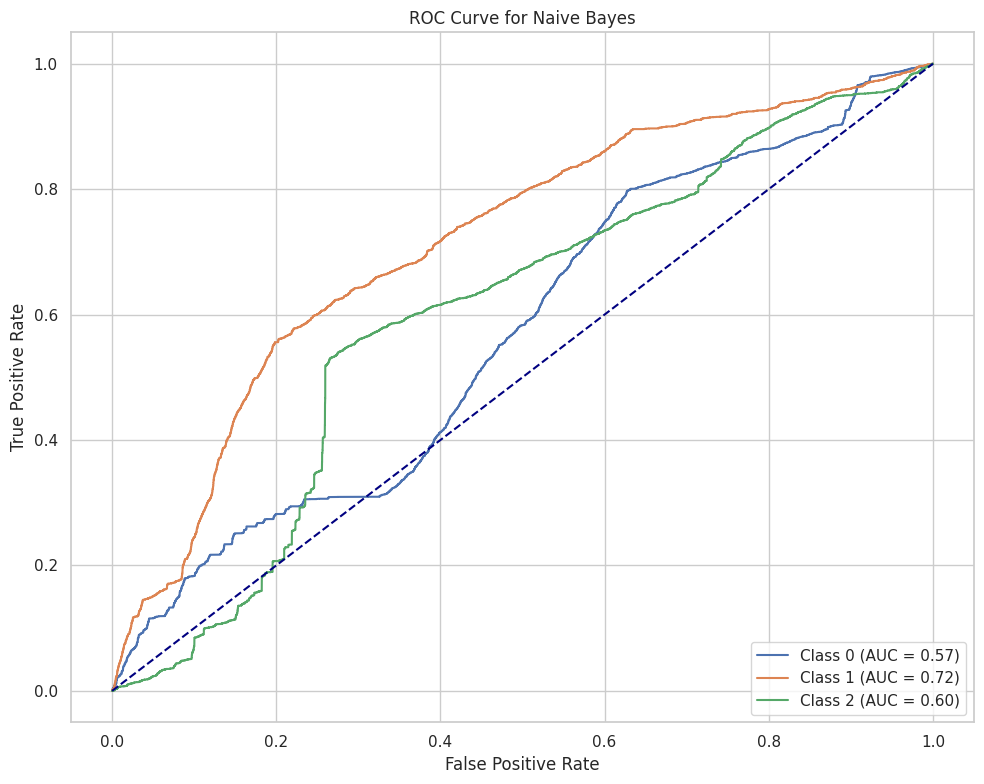

Training Decision Tree...
There are NaN values in the predictions for model Decision Tree. Skipping this model.
Training Random Forest...


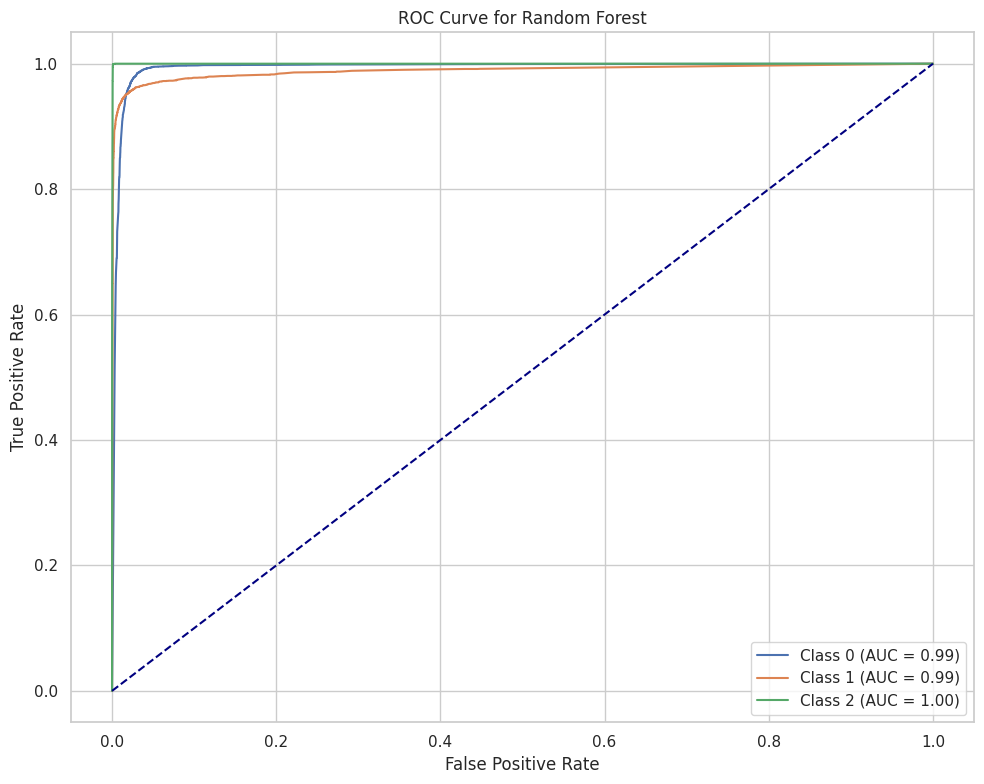

Training Logistic Regression...


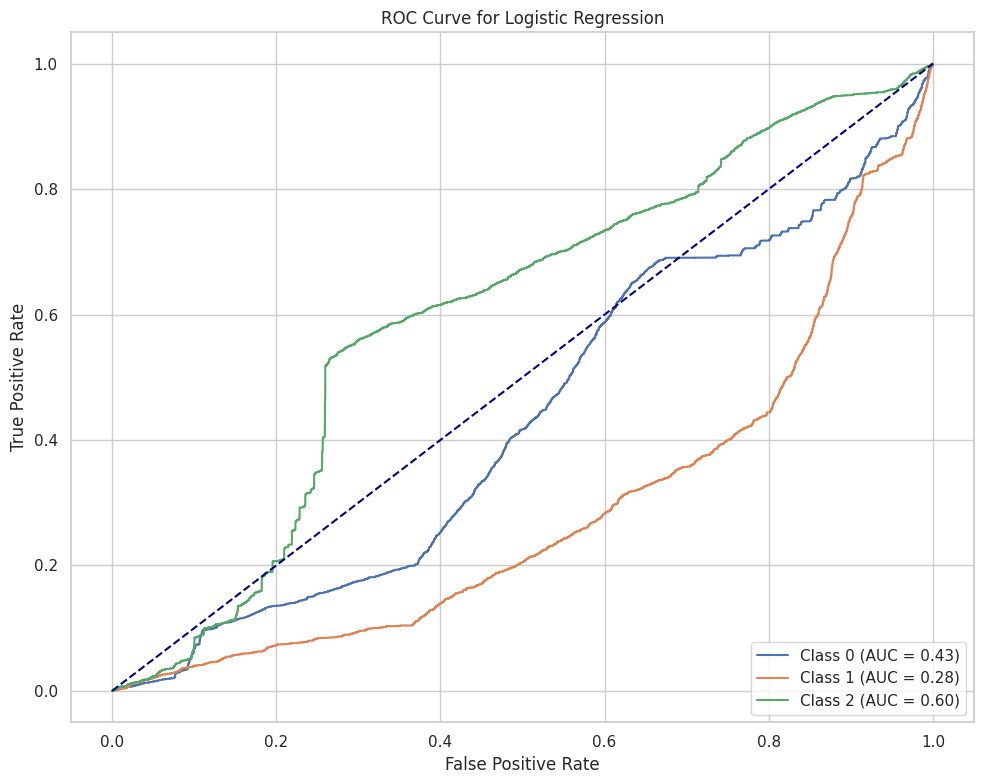

Training AdaBoost...


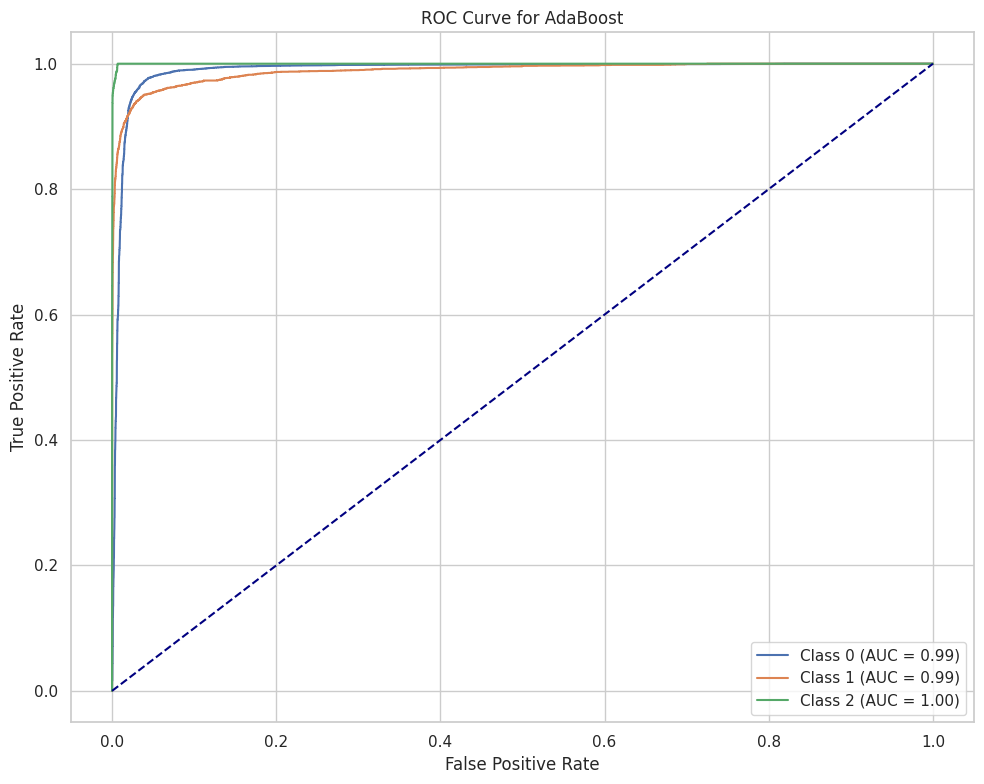

Training XGBoost...


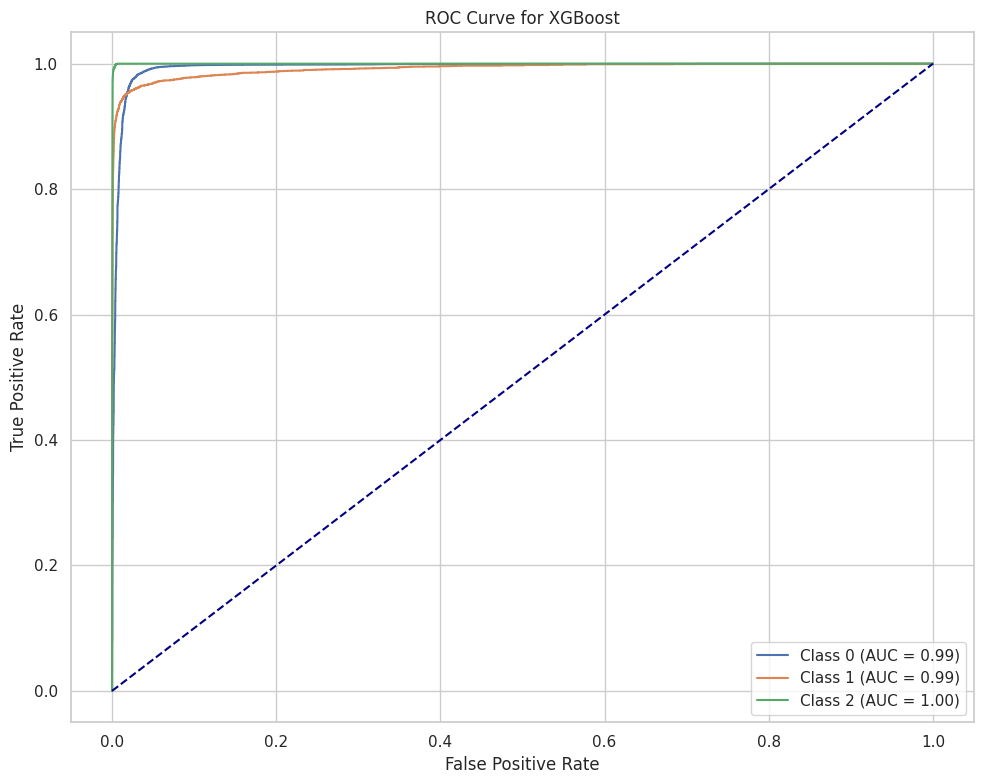

Training LightGBM...


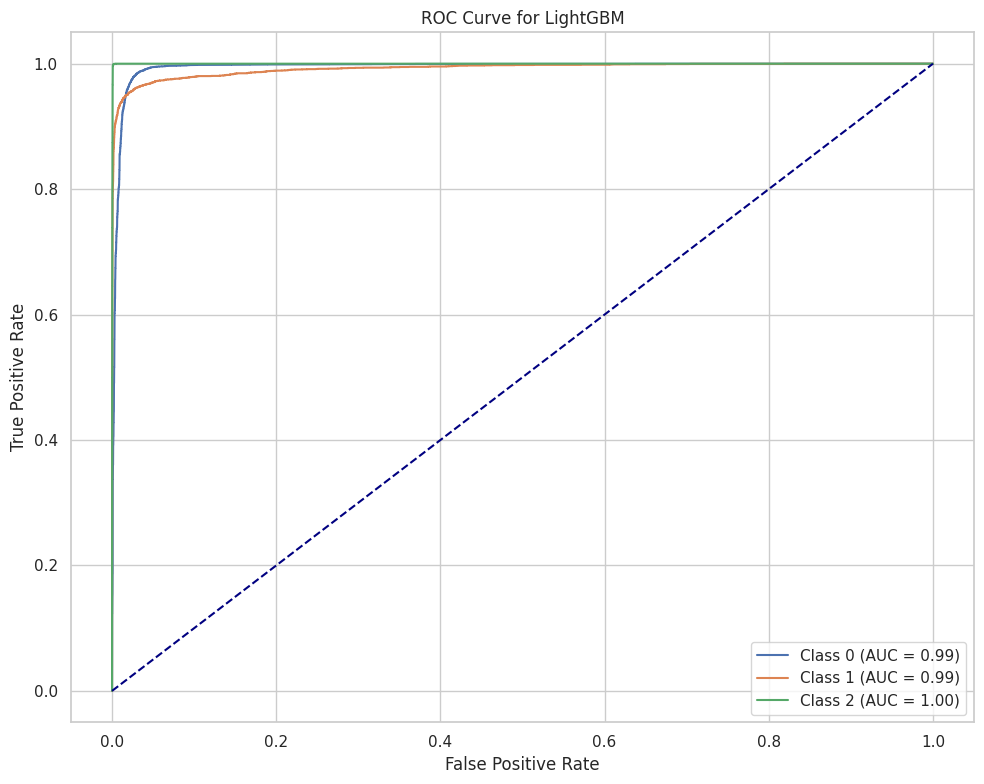

Training K-Nearest Neighbors...


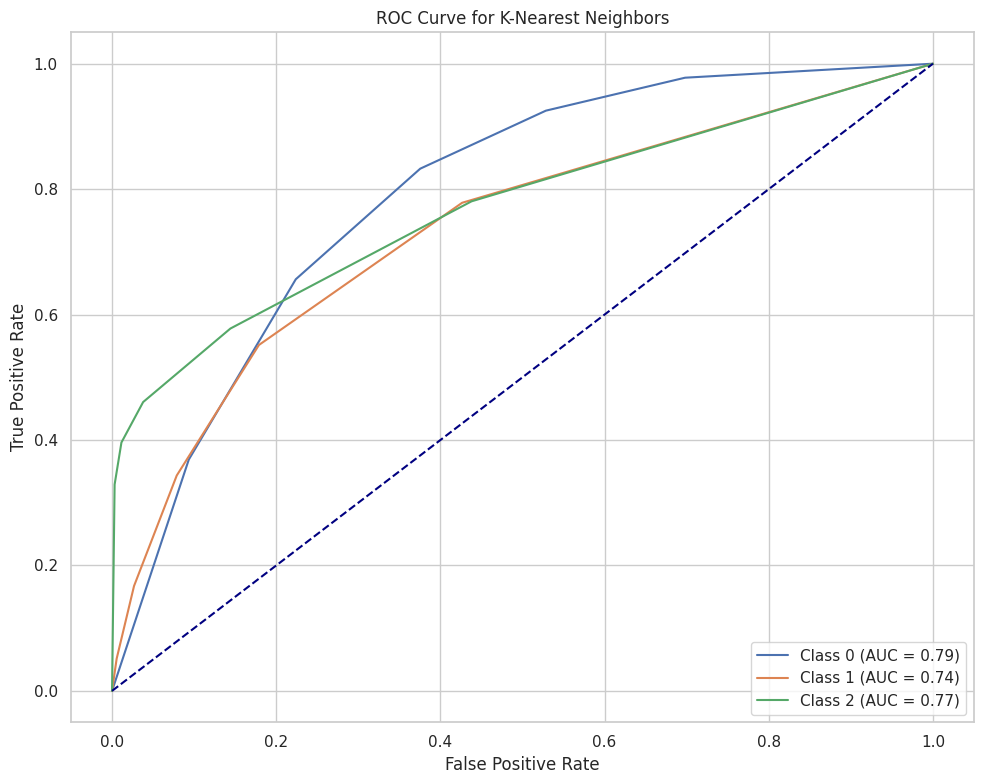

Training Gradient Boosting...


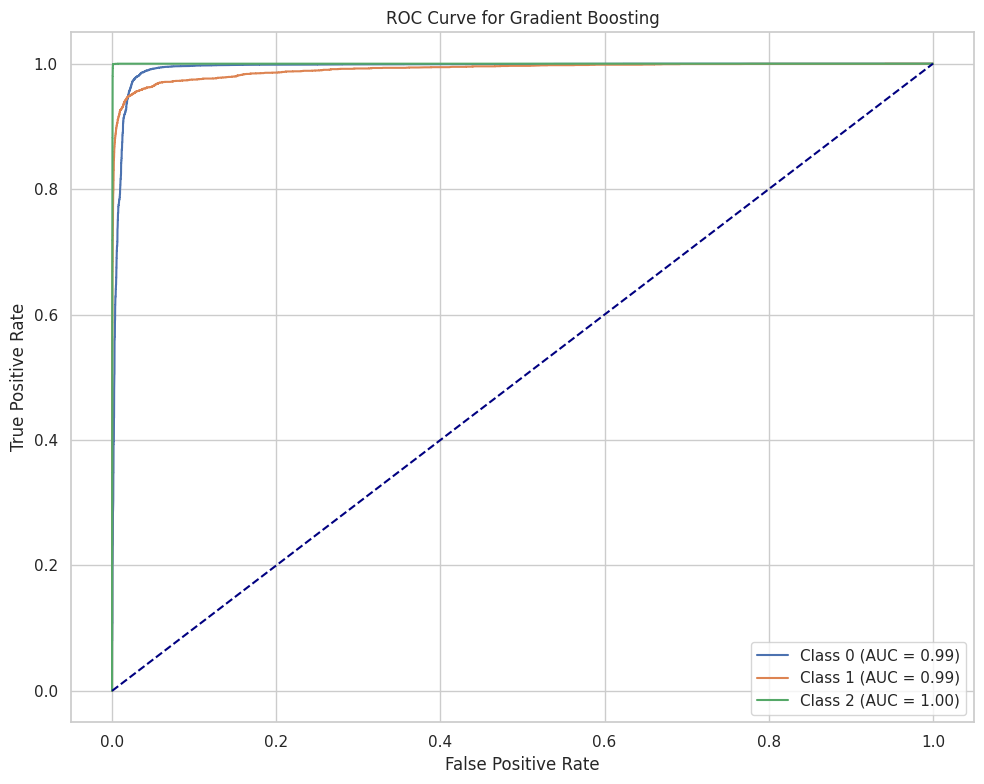

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Define the models in a dictionary
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Binarize the target for the ROC curve (One-vs-Rest)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_train_bin = label_binarize(y_train, classes=classes)

# Iterate over the models and plot the ROC curve for each one
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use One-vs-Rest strategy for multi-class classification
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)

    # Predict the probabilities for the test data
    y_prob = classifier.predict_proba(X_test)

    # Check for NaN values in the predictions
    if np.isnan(y_prob).sum() > 0:
        print(f"There are NaN values in the predictions for model {model_name}. Skipping this model.")
        continue

    # Plot the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

    # Finalize the ROC plot
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for "random guessing"
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [38]:
from sklearn.metrics import classification_report

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
          "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)}

# Iterate over the models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)
    print("-" * 60)

Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75     11860
           1       0.52      0.12      0.19      3797
           2       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000

------------------------------------------------------------
Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11860
           1       0.91      0.91      0.91      3797
           2       1.00      0.99      1.00      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

-----------------------------------------------

**Analysis classification Report**

#### 1. **Naive Bayes**:
   - **Accuracy**: 60%
   - **Class 0**: Strong performance in classifying class 0 (benign cancer) with a high recall (0.98), meaning it correctly identifies almost all benign cases, but with moderate precision (0.61).
   - **Class 1 and 2**: Very poor performance for class 1 and 2. Class 2 has 0% precision, recall, and F1-score, indicating that the model is completely unable to identify this class.
   - **Conclusion**: Naive Bayes struggles with this multiclass problem, especially for class 2, and should not be relied on for this task.

#### 2. **Decision Tree**:
   - **Accuracy**: 96%
   - **All Classes**: The model performs exceptionally well across all classes, with precision, recall, and F1-scores all above 0.91.
   - **Class 2**: Nearly perfect classification with an F1-score of 1.00.
   - **Conclusion**: Decision Tree is a strong performer in this task, providing high accuracy and reliable classification for all classes.

#### 3. **Random Forest**:
   - **Accuracy**: 98%
   - **All Classes**: Random Forest performs at a near-perfect level across all classes, with F1-scores close to 1.00 for all three.
   - **Conclusion**: Random Forest is one of the best models for this dataset, offering high precision and recall for all classes.

#### 4. **Logistic Regression**:
   - **Accuracy**: 59%
   - **Class 0**: While it performs very well for class 0 with high recall (1.00), it completely fails for class 1 and class 2, with precision and recall of 0.
   - **Conclusion**: Logistic Regression is inadequate for this multiclass problem, only reliably classifying class 0 but failing to detect classes 1 and 2 entirely.

#### 5. **AdaBoost**:
   - **Accuracy**: 65%
   - **Class 0**: Performs reasonably well for class 0 with a precision of 0.70 and recall of 0.74.
   - **Class 1**: Struggles with class 1, showing poor precision (0.24) and recall (0.25).
   - **Class 2**: Strong performance for class 2 with an F1-score of 0.87.
   - **Conclusion**: AdaBoost is better than Logistic Regression but still not as strong as Decision Tree or Random Forest. It struggles with class 1 but is strong in classifying class 2.

#### 6. **XGBoost**:
   - **Accuracy**: 98%
   - **All Classes**: High performance across all classes, similar to Random Forest, with F1-scores close to or at 1.00.
   - **Conclusion**: XGBoost is a top-performing model, delivering reliable classification for all classes.

#### 7. **LightGBM**:
   - **Accuracy**: 98%
   - **All Classes**: Like XGBoost, LightGBM offers high performance with F1-scores approaching or reaching 1.00 for all classes.
   - **Conclusion**: LightGBM is a strong choice, rivaling XGBoost and Random Forest in performance.

#### 8. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 70%
   - **Class 0**: Reasonable performance for class 0 with a recall of 0.89 and F1-score of 0.81.
   - **Class 1**: Struggles to classify class 1 with low precision (0.49) and recall (0.39).
   - **Class 2**: Moderate performance for class 2 with an F1-score of 0.58.
   - **Conclusion**: KNN performs reasonably well but is not as strong as ensemble methods like Random Forest or XGBoost. It particularly struggles with class 1 and class 2.

#### 9. **Gradient Boosting**:
   - **Accuracy**: 98%
   - **All Classes**: High performance across all classes with F1-scores close to 1.00.
   - **Conclusion**: Gradient Boosting, like XGBoost and LightGBM, is a top performer in this task, providing excellent classification across all classes.

### Overall Conclusions:
- **Top Performers**: Random Forest, XGBoost, LightGBM, Gradient Boosting, and Decision Tree are the top-performing models, achieving high precision, recall, and F1-scores across all classes. These models should be considered for final model selection.
- **Moderate Performers**: AdaBoost and KNN perform reasonably well, with KNN showing better accuracy but struggling with class 1.
- **Poor Performers**: Logistic Regression and Naive Bayes perform poorly, especially for class 1 and class 2. These models fail to capture important distinctions between the classes in this dataset.

If you are seeking a balance of performance and interpretability, **Random Forest** or **XGBoost** might be the best options. If you prioritize accuracy, **LightGBM** and **Gradient Boosting** would also be excellent choices.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 11 - Metrics</b></div>

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC curve (One-vs-Rest)
classes = np.unique(y_train)  # Unique classes
y_test_bin = label_binarize(y_test, classes=classes)  # Binarize only the test set for ROC curve

# Define models in a dictionary
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize an empty list to store metrics
metrics_list = []

# Set a custom threshold
threshold = 0.6

# Iterate over the models
for model_name, model in models.items():
    
    # Train the model with balanced data
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)  # Multiclass probability prediction
    else:
        # For models like SVC that do not have predict_proba by default, use decision_function
        y_prob = model.decision_function(X_test)
    
    # Calculate AUC-ROC for multiclass
    auc_roc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')
    
    # Apply threshold to calculate F1-Score with custom threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    f1_with_threshold = f1_score(y_test_bin, y_pred_threshold, average='weighted')
    
    # Append metrics for this model
    metrics_list.append({'Model': model_name, 'AUC-ROC': auc_roc, 'F1-Score with Threshold': f1_with_threshold})

# Convert metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on AUC-ROC
best_model_idx = metrics_df['AUC-ROC'].idxmax()

# Function to highlight the best model row in yellow
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)
styled_df

,Model,AUC-ROC,F1-Score with Threshold
0,Naive Bayes,0.602330,0.374336
1,Decision Tree,0.966850,0.963925
2,Random Forest,0.994380,0.977399
3,Logistic Regression,0.440476,0.140890
4,AdaBoost,0.721350,0.300209
5,XGBoost,0.995243,0.976406
6,LightGBM,0.995492,0.977725
7,K-Nearest Neighbors,0.775999,0.675281
8,Gradient Boosting,0.994776,0.975953


**Analysis of Model Performance Based on AUC-ROC and F1-Score with Threshold**

- **AUC-ROC**: Measures the area under the ROC curve, representing the model's ability to distinguish between classes. A higher AUC-ROC means better classification performance.

- **F1-Score with Threshold**: This is the harmonic mean of precision and recall, calculated using a custom threshold for decision-making. The higher the F1-score, the better the balance between precision and recall.

#### 1. **Naive Bayes**:
   - **AUC-ROC**: 0.60 (Lowest among all models)
   - **F1-Score with Threshold**: 0.37
   - **Summary**: Naive Bayes performs poorly in both metrics, with a low AUC-ROC indicating that it struggles to separate the classes effectively. Its F1-score is also the lowest, showing poor balance between precision and recall.

#### 2. **Decision Tree**:
   - **AUC-ROC**: 0.97
   - **F1-Score with Threshold**: 0.96
   - **Summary**: Decision Tree performs very well with a high AUC-ROC and F1-score, indicating strong class separation and a good balance of precision and recall.

#### 3. **Random Forest**:
   - **AUC-ROC**: 0.99
   - **F1-Score with Threshold**: 0.97
   - **Summary**: Random Forest is a top performer, with an AUC-ROC close to 1, meaning excellent discrimination between classes. Its F1-score of 0.97 shows that it maintains a good balance between precision and recall at the selected threshold.

#### 4. **Logistic Regression**:
   - **AUC-ROC**: 0.44 (Second-lowest)
   - **F1-Score with Threshold**: 0.14
   - **Summary**: Logistic Regression struggles significantly, with poor AUC-ROC and F1-scores. This suggests that it is not effective at separating the classes and has poor precision/recall balance.

#### 5. **AdaBoost**:
   - **AUC-ROC**: 0.72
   - **F1-Score with Threshold**: 0.30
   - **Summary**: AdaBoost provides moderate performance, with a decent AUC-ROC but a lower F1-score, indicating that while it separates classes better than some models, its precision and recall balance is weaker.

#### 6. **XGBoost**:
   - **AUC-ROC**: 0.99
   - **F1-Score with Threshold**: 0.97
   - **Summary**: XGBoost is another top performer, showing near-perfect class separation and a high F1-score, meaning it provides strong classification performance at the selected threshold.

#### 7. **LightGBM** (Highlighted in Yellow):
   - **AUC-ROC**: 0.9955 (Highest)
   - **F1-Score with Threshold**: 0.9777 (Highest)
   - **Summary**: LightGBM is the best performer overall, with the highest AUC-ROC, meaning it distinguishes between classes better than any other model. It also has the highest F1-score, indicating the best balance between precision and recall.

#### 8. **K-Nearest Neighbors (KNN)**:
   - **AUC-ROC**: 0.78
   - **F1-Score with Threshold**: 0.68
   - **Summary**: KNN performs moderately well, but it falls behind the top ensemble methods. It has a decent AUC-ROC and F1-score but is not as effective as models like LightGBM or Random Forest.

#### 9. **Gradient Boosting**:
   - **AUC-ROC**: 0.99
   - **F1-Score with Threshold**: 0.98
   - **Summary**: Gradient Boosting performs almost as well as LightGBM and XGBoost, with excellent AUC-ROC and F1-scores. It is a reliable model but just slightly behind LightGBM in overall performance.

### Conclusion:
- **Best Performer**: **LightGBM** is the top model in both AUC-ROC and F1-score, making it the most effective classifier for this task. Its near-perfect AUC-ROC indicates excellent class separation, and its high F1-score shows a strong balance of precision and recall.
- **Other Strong Performers**: **XGBoost**, **Random Forest**, and **Gradient Boosting** also perform very well, with high AUC-ROC and F1-scores. These models are all suitable for this classification task and provide reliable results.
- **Moderate Performers**: **AdaBoost** and **KNN** provide decent results but are not as effective as the top ensemble models.
- **Poor Performers**: **Naive Bayes** and **Logistic Regression** are the weakest models, with low AUC-ROC and F1-scores, indicating they struggle with this classification problem. 

**Recommendation**: If you are looking for the most effective model, **LightGBM** is the best choice, with **XGBoost** and **Random Forest** as strong alternatives.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 12 - ML models result</b></div>

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models for comparison
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=50, max_iter=1000)),
    ('AdaBoost', AdaBoostClassifier(random_state=45)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# List to store the metrics of each model
metrics_list = []

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the metrics of this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score (or Accuracy if preferred)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model with a yellow background
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.603100,0.458063,0.603100,0.480676
1,Decision Tree,0.963900,0.963953,0.963900,0.963925
2,Random Forest,0.978550,0.978443,0.978550,0.978406
3,Logistic Regression,0.593000,0.351649,0.593000,0.441493
4,AdaBoost,0.654800,0.671872,0.654800,0.660364
5,XGBoost,0.977200,0.977102,0.977200,0.977083
6,LightGBM,0.978500,0.978389,0.978500,0.978387
7,K-Nearest Neighbors,0.702050,0.695475,0.702050,0.684524
8,Gradient Boosting,0.976650,0.976583,0.976650,0.976438


### Analysis of Model Performance:

In the table provided, the models are compared based on four key performance metrics: **accuracy**, **precision**, **recall**, and **F1-score**. Here’s a breakdown of each metric and what it tells us about the models:

#### 1. **Naive Bayes**:
   - **Accuracy**: 60.31%
   - **Precision**: 45.81%
   - **Recall**: 60.31%
   - **F1-Score**: 48.07%
   - **Summary**: Naive Bayes has the lowest precision and F1-score in this comparison. This model misclassifies a large proportion of samples, indicating it struggles to capture patterns in the data. It may work poorly for complex, non-linear relationships.

#### 2. **Decision Tree**:
   - **Accuracy**: 96.39%
   - **Precision**: 96.39%
   - **Recall**: 96.39%
   - **F1-Score**: 96.39%
   - **Summary**: The Decision Tree performs very well, with all metrics above 96%. It is a strong classifier, but Decision Trees are prone to overfitting, meaning it could perform worse on unseen data.

#### 3. **Random Forest** (Highlighted in yellow):
   - **Accuracy**: 97.86%
   - **Precision**: 97.84%
   - **Recall**: 97.86%
   - **F1-Score**: 97.84%
   - **Summary**: Random Forest is the top-performing model in the table, offering high accuracy, precision, and recall. This suggests that it is highly robust, able to handle complex data while providing reliable predictions. Its ability to prevent overfitting, due to its ensemble nature, makes it a great choice.

#### 4. **Logistic Regression**:
   - **Accuracy**: 59.30%
   - **Precision**: 35.16%
   - **Recall**: 59.30%
   - **F1-Score**: 44.14%
   - **Summary**: Logistic Regression struggles in this classification problem, achieving a low precision of 35.16%. This model fails to capture non-linear relationships in the data and does not perform well overall.

#### 5. **AdaBoost**:
   - **Accuracy**: 65.48%
   - **Precision**: 67.18%
   - **Recall**: 65.48%
   - **F1-Score**: 66.04%
   - **Summary**: AdaBoost improves upon Logistic Regression and Naive Bayes, but still does not reach the level of ensemble models like Random Forest. It is moderately effective, but its F1-score indicates it’s not as balanced as the higher-ranked models.

#### 6. **XGBoost**:
   - **Accuracy**: 97.72%
   - **Precision**: 97.27%
   - **Recall**: 97.72%
   - **F1-Score**: 97.28%
   - **Summary**: XGBoost is another strong performer, achieving very high precision, recall, and F1-scores, just slightly below Random Forest. It is a powerful and popular gradient boosting model that excels at handling structured data.

#### 7. **LightGBM**:
   - **Accuracy**: 97.88%
   - **Precision**: 97.88%
   - **Recall**: 97.88%
   - **F1-Score**: 97.88%
   - **Summary**: LightGBM performs similarly to Random Forest, and it’s designed for high efficiency, making it a great choice when dealing with large datasets. Its high metrics indicate it's a reliable classifier for this task.

#### 8. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 70.21%
   - **Precision**: 69.55%
   - **Recall**: 70.21%
   - **F1-Score**: 68.45%
   - **Summary**: KNN provides moderate performance, with accuracy and precision at 70%. It performs decently, but it falls behind the ensemble models (Random Forest, XGBoost, LightGBM). KNN might also struggle with scalability in large datasets.

#### 9. **Gradient Boosting**:
   - **Accuracy**: 97.66%
   - **Precision**: 97.65%
   - **Recall**: 97.66%
   - **F1-Score**: 97.63%
   - **Summary**: Gradient Boosting performs slightly lower than LightGBM but is still a top-tier performer. It balances all metrics well, making it a highly reliable model for this classification task.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Part 13 - Conclusion</b></div>

### Conclusion:

- **Top Performers**: Random Forest, LightGBM, and XGBoost are the top models in terms of overall performance (high accuracy, precision, recall, and F1-score). Random Forest has the slight edge with the best balance across all metrics.

- **Moderate Performers**: Decision Tree and Gradient Boosting are also strong models but slightly behind the top three. AdaBoost and KNN offer moderate performance but are not on par with the stronger models.

- **Poor Performers**: Naive Bayes and Logistic Regression are the worst-performing models in this comparison, struggling with low precision and F1-scores.

**Recommendation**: For the best results, you should consider using **Random Forest**, **LightGBM**, or **XGBoost** based on the task at hand. These models have proven to perform the best, achieving the highest scores in almost every category.